In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Downloads/teen_phone_addiction_dataset.csv")

In [5]:
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [9]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


Text(0.5, 1.0, 'Box plot of Depression_Level')

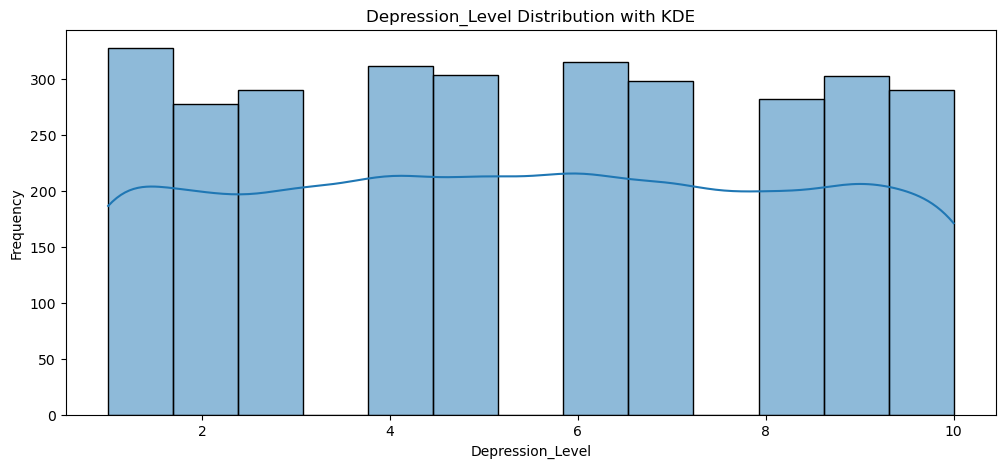

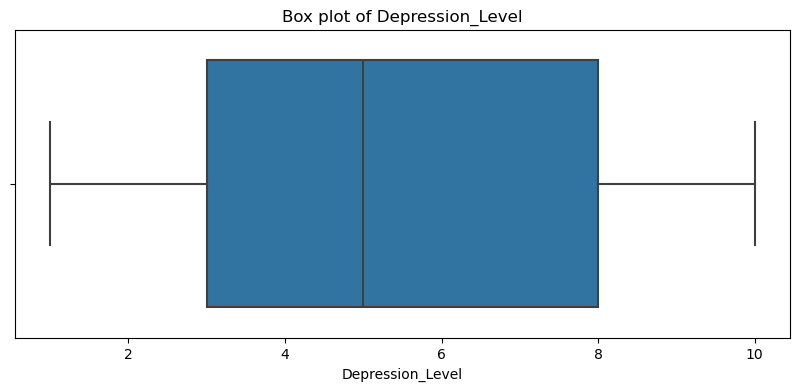

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(df['Depression_Level'], kde = True)
plt.title("Depression_Level Distribution with KDE")
plt.xlabel("Depression_Level")
plt.ylabel("Frequency")


plt.figure(figsize = (10,4))
sns.boxplot(x = df['Depression_Level'])
plt.title("Box plot of Depression_Level")

In [13]:
new_df = df[['Age', 'Gender', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours','Addiction_Level']]

In [15]:
new_df

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,13,Female,9th,4.0,6.1,78,5,0.1,10,3,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,17,Female,7th,5.5,6.5,70,5,0.0,3,7,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,13,Other,11th,5.8,5.5,93,8,0.8,2,3,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,18,Female,12th,3.1,3.9,78,8,1.6,9,10,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,14,Other,9th,2.5,6.7,56,4,1.1,1,5,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,Female,12th,3.9,6.4,53,4,0.9,7,10,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,13,Female,8th,3.6,7.3,93,5,0.0,8,8,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,14,Other,7th,3.2,6.5,98,1,0.0,4,3,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,17,Female,9th,6.7,7.5,67,3,0.2,3,5,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


In [17]:
df_cleaned = pd.get_dummies(new_df,drop_first=True)

In [19]:
df_cleaned

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,Gender_Other,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
0,13,4.0,6.1,78,5,0.1,10,3,8,0,...,False,False,False,False,False,True,False,False,False,False
1,17,5.5,6.5,70,5,0.0,3,7,3,0,...,False,False,False,True,False,False,False,False,False,False
2,13,5.8,5.5,93,8,0.8,2,3,10,0,...,True,True,False,False,False,False,True,False,False,False
3,18,3.1,3.9,78,8,1.6,9,10,3,0,...,False,False,True,False,False,False,False,False,False,True
4,14,2.5,6.7,56,4,1.1,1,5,1,0,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16,3.9,6.4,53,4,0.9,7,10,2,1,...,False,False,True,False,False,False,False,False,True,False
2996,13,3.6,7.3,93,5,0.0,8,8,9,1,...,False,False,False,False,True,False,False,True,False,False
2997,14,3.2,6.5,98,1,0.0,4,3,9,0,...,True,False,False,True,False,False,False,False,False,True
2998,17,6.7,7.5,67,3,0.2,3,5,9,0,...,False,False,False,False,False,True,False,False,False,False


In [21]:
df_cleaned.corr()

,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,...,Gender_Other,School_Grade_11th,School_Grade_12th,School_Grade_7th,School_Grade_8th,School_Grade_9th,Phone_Usage_Purpose_Education,Phone_Usage_Purpose_Gaming,Phone_Usage_Purpose_Other,Phone_Usage_Purpose_Social Media
Age,1.000000,0.040689,0.014725,0.023481,-0.020240,0.001187,0.014651,0.052699,-0.033177,0.028212,...,-0.025519,0.002530,0.001340,-0.010784,0.010323,-0.018529,0.027725,0.004009,-0.006669,0.004445
Daily_Usage_Hours,0.040689,1.000000,0.016444,0.021345,-0.030383,-0.005930,-0.007221,0.009672,0.006340,0.000970,...,-0.024214,0.009165,-0.019822,0.012847,0.010226,-0.002003,-0.021929,0.017301,0.022255,-0.038176
Sleep_Hours,0.014725,0.016444,1.000000,-0.000273,-0.017898,0.006814,0.009836,-0.011518,0.016488,0.005670,...,-0.010882,-0.035777,-0.009323,-0.001813,0.054466,-0.006597,0.036554,-0.038506,0.011180,-0.005350
Academic_Performance,0.023481,0.021345,-0.000273,1.000000,0.011815,-0.002509,0.003427,-0.026509,-0.005459,0.003186,...,0.023616,0.017183,0.021379,-0.029424,-0.022914,0.027925,0.009564,0.020965,-0.024375,-0.007482
Social_Interactions,-0.020240,-0.030383,-0.017898,0.011815,1.000000,0.005955,0.004341,0.024195,0.008314,-0.023291,...,-0.004174,0.005572,-0.002693,-0.003296,-0.014770,0.010509,0.022858,0.004843,-0.019843,-0.004899
Exercise_Hours,0.001187,-0.005930,0.006814,-0.002509,0.005955,1.000000,0.004525,-0.011770,-0.014320,0.020701,...,0.002875,-0.036276,0.003319,-0.006728,0.012727,0.024836,-0.008024,-0.024739,0.020044,-0.018082
Anxiety_Level,0.014651,-0.007221,0.009836,0.003427,0.004341,0.004525,1.000000,0.018607,0.003951,-0.011530,...,0.000140,0.029720,-0.007902,0.017301,-0.014252,0.000807,0.043144,-0.032153,0.007971,-0.003003
Depression_Level,0.052699,0.009672,-0.011518,-0.026509,0.024195,-0.011770,0.018607,1.000000,-0.026647,0.014949,...,-0.010838,0.020127,-0.011734,0.008186,0.014897,-0.018055,0.006053,-0.019844,0.003057,0.011299
Self_Esteem,-0.033177,0.006340,0.016488,-0.005459,0.008314,-0.014320,0.003951,-0.026647,1.000000,-0.028093,...,-0.019091,-0.007856,-0.010706,0.013313,0.004972,0.019807,0.003232,-0.005509,0.007526,-0.028761
Parental_Control,0.028212,0.000970,0.005670,0.003186,-0.023291,0.020701,-0.011530,0.014949,-0.028093,1.000000,...,-0.010905,-0.021866,0.018581,0.008707,-0.020943,0.017784,0.010963,-0.027475,0.035259,0.000480


In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df['Depression_Level'], kde = True)
plt.title("Depression_Level Distribution with KDE")
plt.xlabel("Depression_Level")
plt.ylabel("Frequency")


plt.figure(figsize = (10,4))
sns.boxplot(x = df['Depression_Level'])
plt.title("Box plot of Depression_Level")

<Axes: >

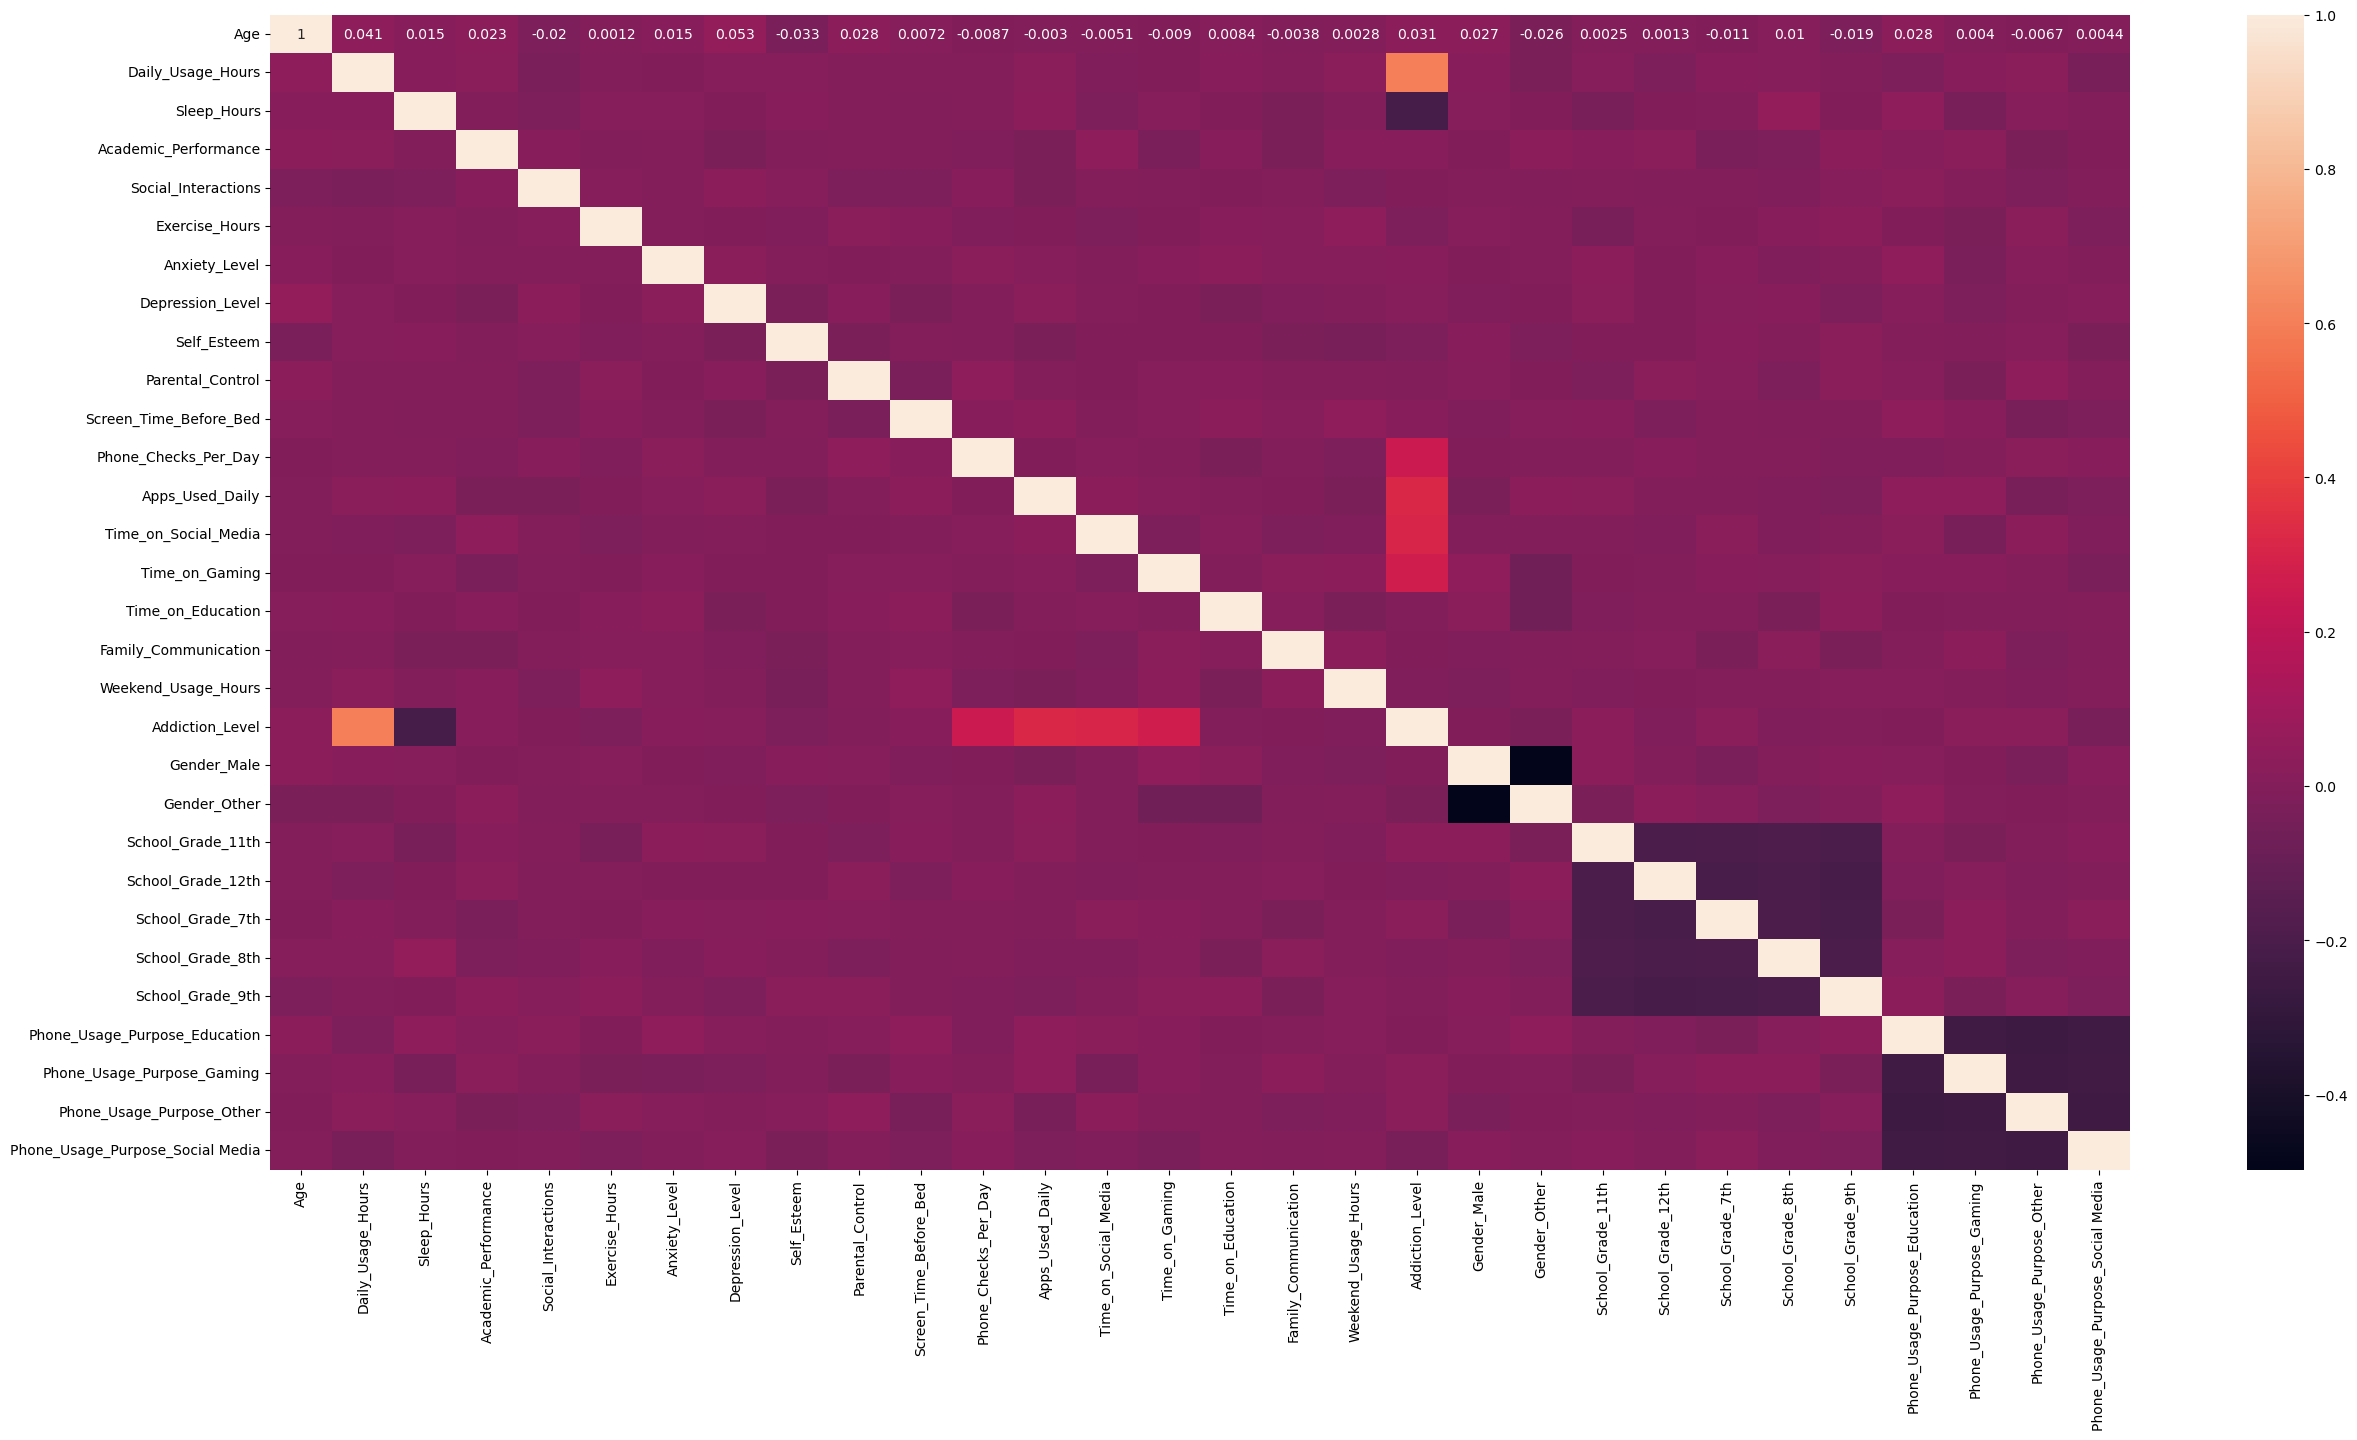

In [23]:
plt.figure(figsize=(30,15))
sns.heatmap(df_cleaned.corr(),annot=True)

In [25]:
x=df_cleaned[['Daily_Usage_Hours','Phone_Usage_Purpose_Gaming','Phone_Usage_Purpose_Other','Phone_Usage_Purpose_Social Media']]
y=df_cleaned['Addiction_Level']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
model = LinearRegression()

In [33]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test)  # unknown  to the model
y_train_pred = model.predict(x_train) # known  to the model

In [37]:
print(f" Testing results : {r2_score(y_test,y_pred)}")
print(f" Training results : {r2_score(y_train,y_train_pred)}")

 Testing results : 0.36703138406533076
 Training results : 0.3597650009717587
